In [12]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
Icfile_1 = fits.open("Downloads\CAB Assignment data\ch2_xsm_20210923_v1_level2.lc")
Icfile_2 = fits.open("Downloads\CAB Assignment data\ch2_xsm_20210924_v1_level2.lc")
Icfile_3 = fits.open("Downloads\CAB Assignment data\ch2_xsm_20210927_v1_level2.lc")
Icfile_4 = fits.open("Downloads\CAB Assignment data\ch2_xsm_20210928_v1_level2.lc")
Icfile_5 = fits.open("Downloads\CAB Assignment data\ch2_xsm_20210929_v1_level2.lc")
Ic_array=[Icfile_1,Icfile_2,Icfile_3,Icfile_4,Icfile_5]
#Displaying HDU Lists of IC file 1
print(Icfile_1.info())
IC1_primary=Icfile_1[0].header
IC1_rate=Icfile_1[1].header
IC1_primary

Filename: Downloads\CAB Assignment data\ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
None


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [13]:
IC1_rate

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

In [16]:
#From this we understand that rate header is the important one which contains the data
IC1_data=Icfile_1[1].data
print(IC1_data)
print(IC1_data.dtype)
print(IC1_data.shape)
#This shows that data file contains 84280 observations which is approximately for 1 day as there are 86400 seconds
#The data file is an array of 4 tuples which contains time and rate as its 1st and 2nd column resp. which we have to plot

[(1.49126401e+08, 494.83276, 22.244837, 1.)
 (1.49126402e+08, 518.2688 , 22.765518, 1.)
 (1.49126403e+08, 504.4697 , 22.460403, 1.) ...
 (1.49212797e+08, 376.00684, 19.390896, 1.)
 (1.49212798e+08, 374.12167, 19.342226, 1.)
 (1.49212799e+08, 401.34076, 20.033491, 1.)]
(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])
(84280,)


<IPython.core.display.Javascript object>


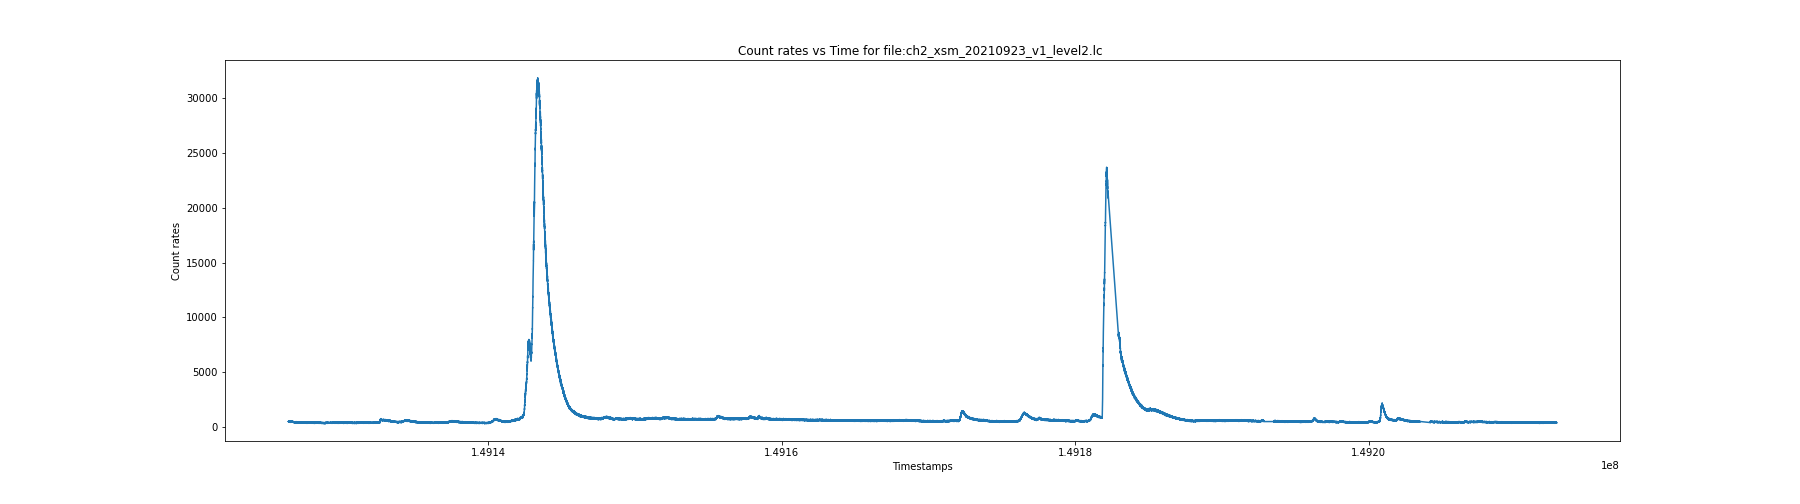

<IPython.core.display.Javascript object>


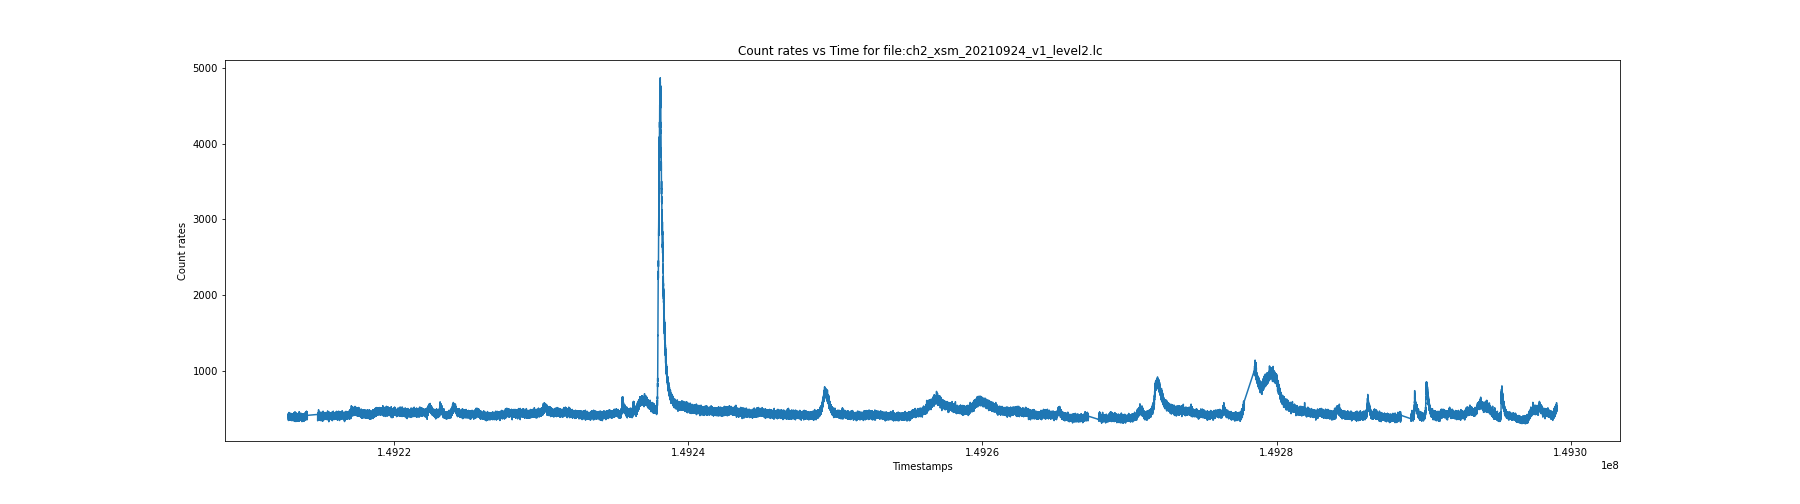

<IPython.core.display.Javascript object>


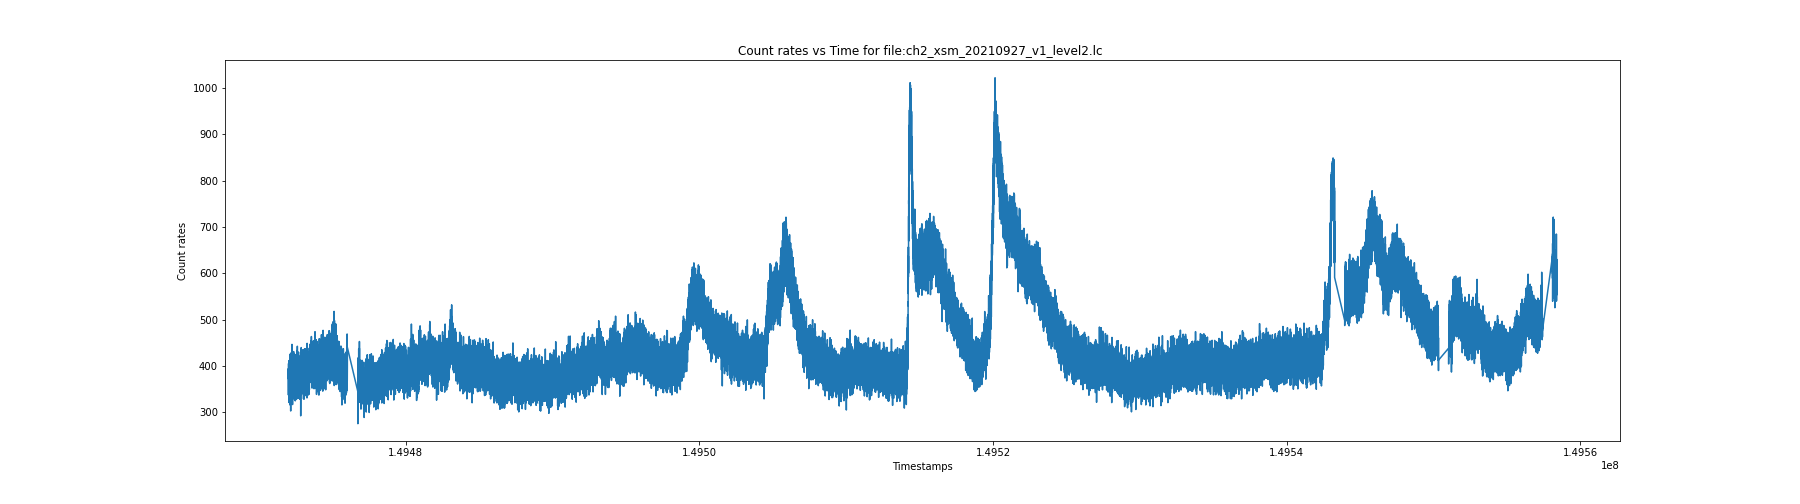

<IPython.core.display.Javascript object>


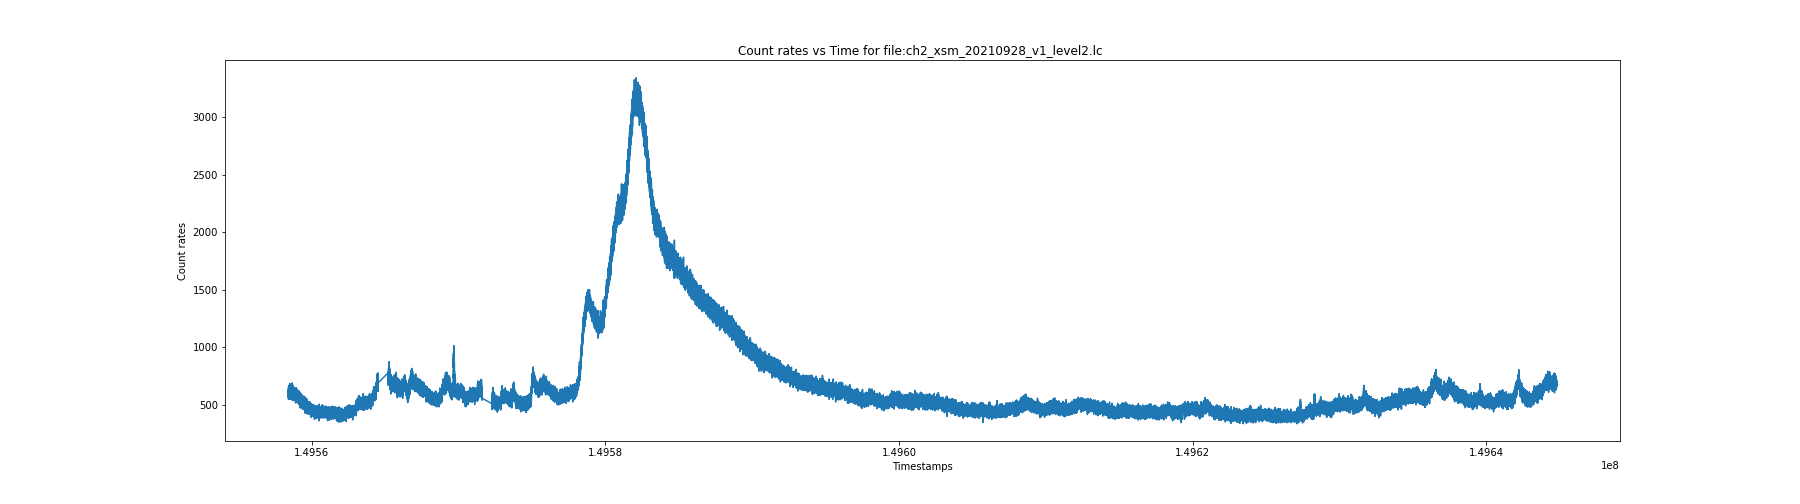

<IPython.core.display.Javascript object>


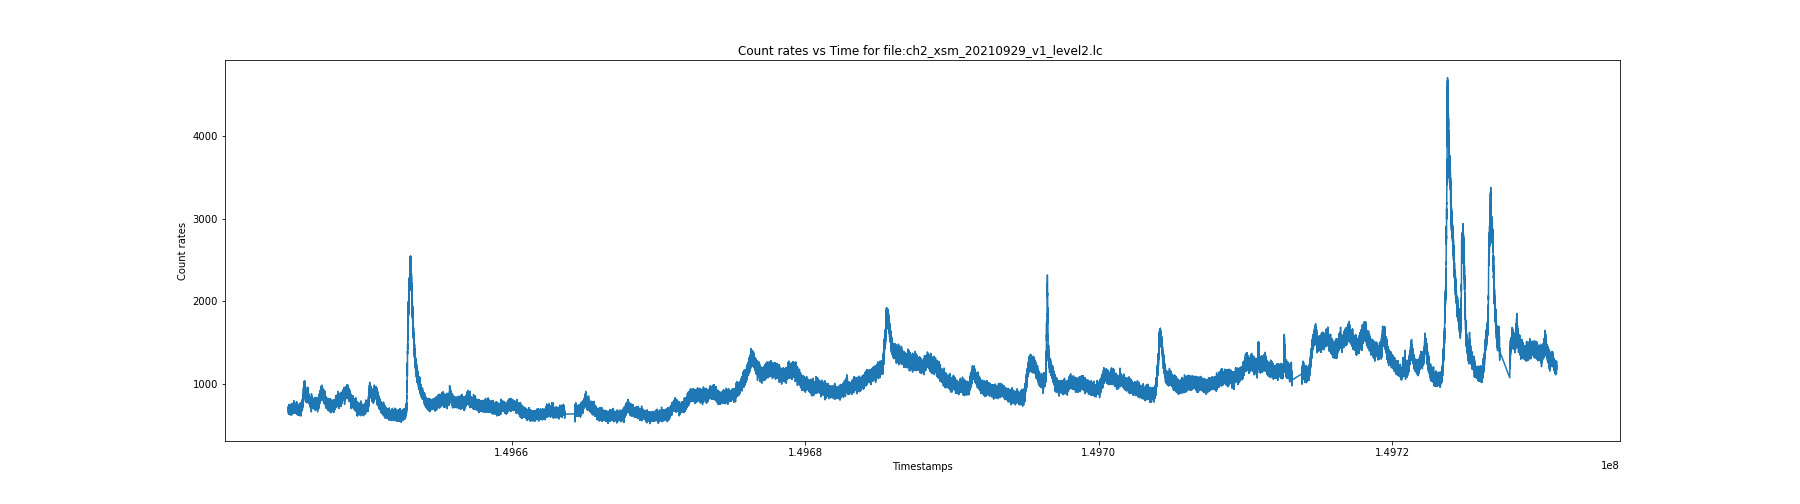

In [17]:
#For plotting all 5 lightcurves by using a loop we get
for ICFile in Ic_array:
    fig,ax=plt.subplots(1,1,figsize=(25,7))
    ax.plot(ICFile[1].data['TIME'],ICFile[1].data['RATE'])
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Count rates")
    ax.set_title(f"Count rates vs Time for file:{ICFile[0].header['FILENAME']} ")

<IPython.core.display.Javascript object>


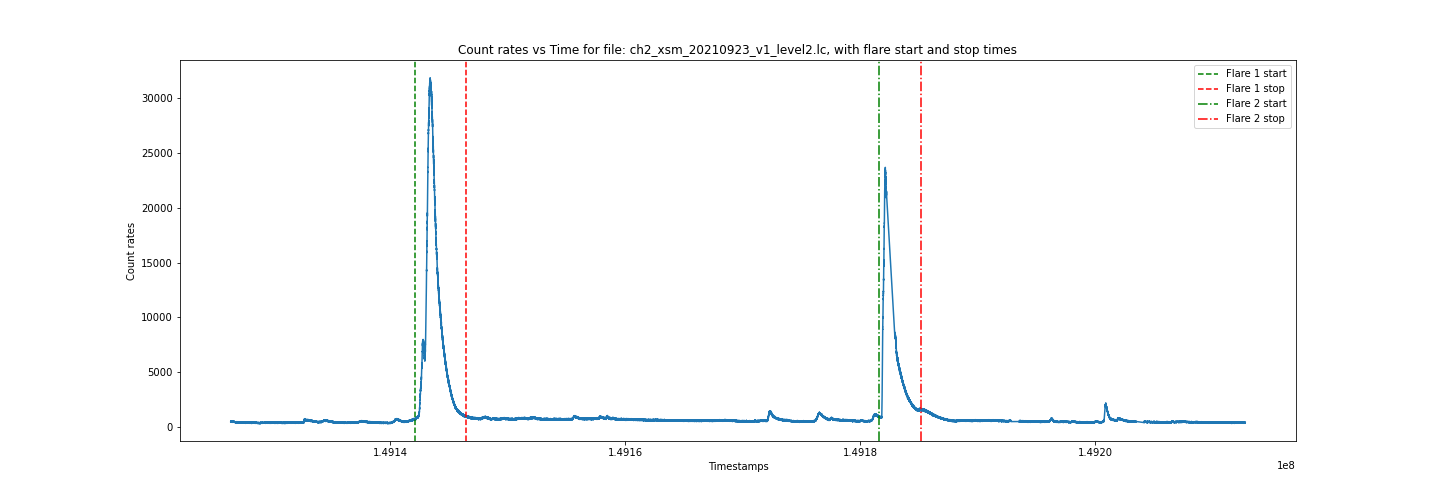

In [23]:
#The time axis has started not from 0 but 1.49126401e+08 meaning the device had its clock started way before the mission was launched
#As mentioned before the observation was done for almost a day (less than 86400 observations)
#Identifying flares visually is done where there are sudden peaks in the graph and its start and end points are taken from where slope suddenly increases or decreases
#Taking Curve 1 and identifying its start and end time and plotting it as follows
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
ax.plot(Icfile_1[1].data['TIME'], Icfile_1[1].data['RATE'])
ax.set_xlabel("Timestamps")
ax.set_ylabel("Count rates")
ax.set_title(f"Count rates vs Time for file: {Icfile_1[0].header['FILENAME']}, with flare start and stop times")
ax.axvline(x = 1.4914209e8, color = "green", label = "Flare 1 start", linestyle = "dashed")
ax.axvline(x = 1.4914643e8, color = "red", label = "Flare 1 stop", linestyle = "dashed")
ax.axvline(x = 1.4918162e8, color = "green", label = "Flare 2 start", linestyle = "dashdot")
ax.axvline(x = 1.4918516e8, color = "red", label = "Flare 2 stop", linestyle = "dashdot")
ax.legend()

In [30]:
mean_background=np.mean(Icfile_1[1].data['RATE'])
print(f"Mean background rate is {mean_background}")
#For mean count rates
#For 1st flare
Flare1_Start = 1.4914209e8
Flare1_Stop = 1.4914643e8
Flare1_width = np.intersect1d(np.where(Icfile_1[1].data['TIME']>Flare1_Start)[0],np.where(Icfile_1[1].data['TIME']<Flare1_Stop)[0])
Flare1_countrates=Icfile_1[1].data['RATE'][Flare1_width]
print(f"Mean count rate for 1st flare is {np.mean(Flare1_countrates)}")
#For 2nd Flare
Flare2_Start = 1.4918162e8
Flare2_Stop = 1.4918516e8
Flare2_width = np.intersect1d(np.where(Icfile_1[1].data['TIME']>Flare2_Start)[0],np.where(Icfile_1[1].data['TIME']<Flare2_Stop)[0])
Flare2_countrates=Icfile_1[1].data['RATE'][Flare2_width]
print(f"Mean count rate for 2nd flare is {np.mean(Flare2_countrates)}")
#For peak count rate for flares
Max1_flare=np.max(Flare1_countrates)
Max2_flare=np.max(Flare2_countrates)
print(f"Peak count rate for 1st flare is {Max1_flare}")
print(f"Peak count rate for 2nd flare is {Max2_flare}")

Mean background rate is 1151.8309326171875
Mean count rate for 1st flare is 8533.6630859375
Mean count rate for 2nd flare is 4946.984375
Peak count rate for 1st flare is 31883.888671875
Peak count rate for 2nd flare is 23705.484375
